Часть 1. Линейные методы  
Каждое задание должно включать выгрузку и предварительную обработку данных, применение метода снижения размерности, а также, возможно, обучение модели на полученных признаках и оценку ее производительности.
Если вам нужно больше данных для этих задач, вы можете посетить эти ресурсы:  
•	[UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php),  
•	[Kaggle Datasets](https://www.kaggle.com/datasets),  
•	[Google's Dataset Search](https://datasetsearch.research.google.com/)   

Задание 1: Применение метода главных компонент (PCA).  
Используйте набор данных "Iris" из sklearn.datasets. Примените PCA, чтобы снизить размерность до 2-х и визуализируйте результаты.

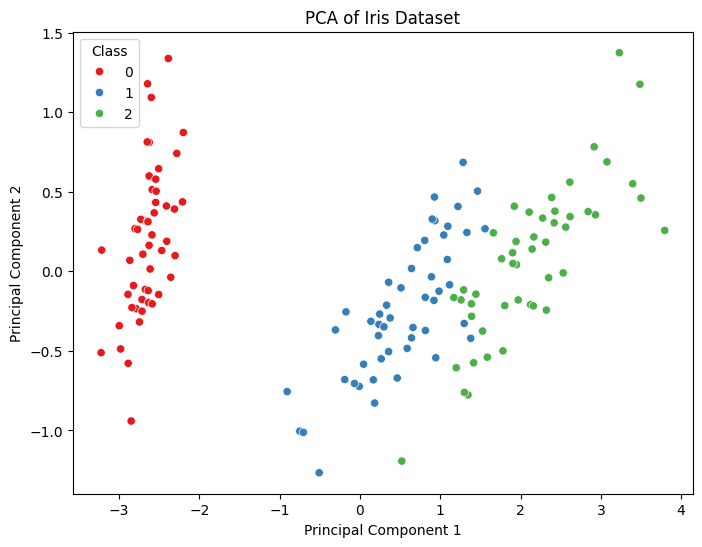

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Загрузка набора Iris
data = load_iris()
X = data.data  # Матрица признаков (длина и ширина чашелистиков и лепестков)
y = data.target  # Массив меток классов (вид цветка)

# Применяем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Создаем DataFrame для удобной визуализации
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y

# Визуализируем данные после применения PCA
plt.figure(figsize=(8, 6))
sb.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='Set1')
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Class')
plt.show()

Задание 2: Сравнение PCA и Factor Analysis.  
Используйте набор данных "Wine" из sklearn.datasets. Примените PCA и Factor Analysis, чтобы снизить размерность до 2-х и визуализируйте различия в результатах.

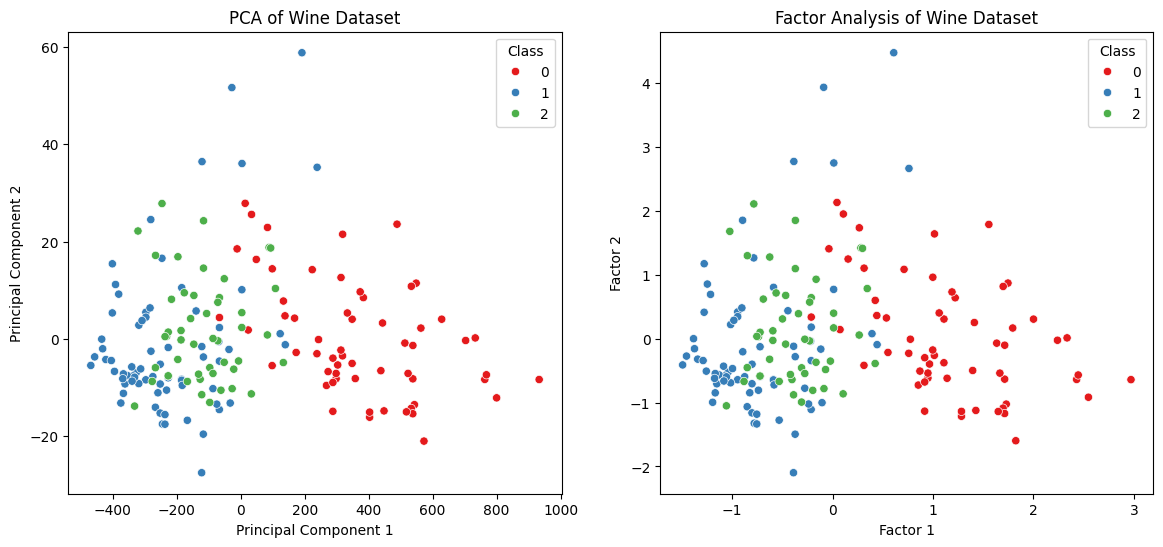

In [4]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Загрузка набора данных Wine
data = load_wine()
X = data.data  # Матрица признаков (химические свойства вина)
y = data.target  # Массив меток классов (тип вина)

# Применяем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Применяем Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

# Создаем DataFrames для удобной визуализации
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Class'] = y

fa_df = pd.DataFrame(data=X_fa, columns=['FA1', 'FA2'])
fa_df['Class'] = y

# Визуализация результатов PCA
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sb.scatterplot(x='PCA1', y='PCA2', hue='Class', data=pca_df, palette='Set1')
plt.title("PCA of Wine Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Визуализация результатов Factor Analysis
plt.subplot(1, 2, 2)
sb.scatterplot(x='FA1', y='FA2', hue='Class', data=fa_df, palette='Set1')
plt.title("Factor Analysis of Wine Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

plt.show()

Задание 3: Исследование влияния предобработки данных на результаты PCA.  
Используйте набор данных "Boston Housing" из sklearn.datasets. Примените различные методы предобработки (например, масштабирование, нормализацию) перед применением PCA и сравните полученные результаты.

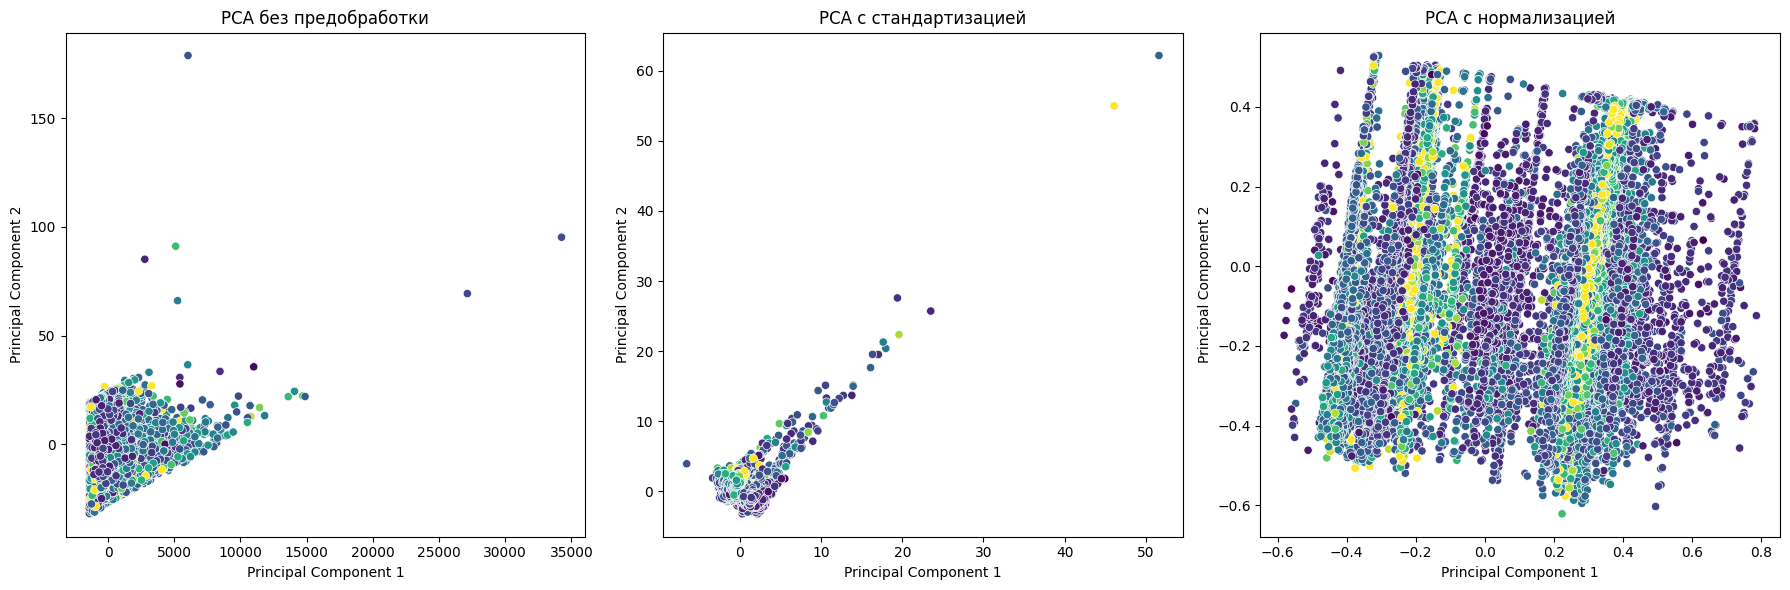

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Загрузка набора данных California Housing
data = fetch_california_housing()
X = data.data  # Матрица признаков (экономические и географические параметры жилья)
y = data.target  # Целевая переменная (цены на жильё)

# Без предобработки
pca = PCA(n_components=2)
X_pca_no_scaling = pca.fit_transform(X)

# Стандартизация данных (Standard Scaling)
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X)
X_pca_standard = pca.fit_transform(X_scaled_standard)

# Нормализация данных (MinMax Scaling)
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)
X_pca_minmax = pca.fit_transform(X_scaled_minmax)

# Создаем DataFrames для удобной визуализации
df_no_scaling = pd.DataFrame(data=X_pca_no_scaling, columns=['PC1', 'PC2'])
df_no_scaling['Target'] = y

df_standard = pd.DataFrame(data=X_pca_standard, columns=['PC1', 'PC2'])
df_standard['Target'] = y

df_minmax = pd.DataFrame(data=X_pca_minmax, columns=['PC1', 'PC2'])
df_minmax['Target'] = y

# Визуализация результатов для разных методов предобработки
plt.figure(figsize=(18, 6))

# Без предобработки
plt.subplot(1, 3, 1)
sb.scatterplot(x='PC1', y='PC2', hue='Target', data=df_no_scaling, palette='viridis', legend=None)
plt.title("PCA без предобработки")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# С масштабированием (Standard Scaling)
plt.subplot(1, 3, 2)
sb.scatterplot(x='PC1', y='PC2', hue='Target', data=df_standard, palette='viridis', legend=None)
plt.title("PCA с стандартизацией")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# С нормализацией (MinMax Scaling)
plt.subplot(1, 3, 3)
sb.scatterplot(x='PC1', y='PC2', hue='Target', data=df_minmax, palette='viridis', legend=None)
plt.title("PCA с нормализацией")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


Задание 4: Применение Disciminant Analysis.  
Используйте набор данных "Iris" из sklearn.datasets. Примените Linear Discriminant Analysis (LDA) и Quadratic Discriminant Analysis (QDA), чтобы снизить размерность до 2-х и визуализируйте результаты.

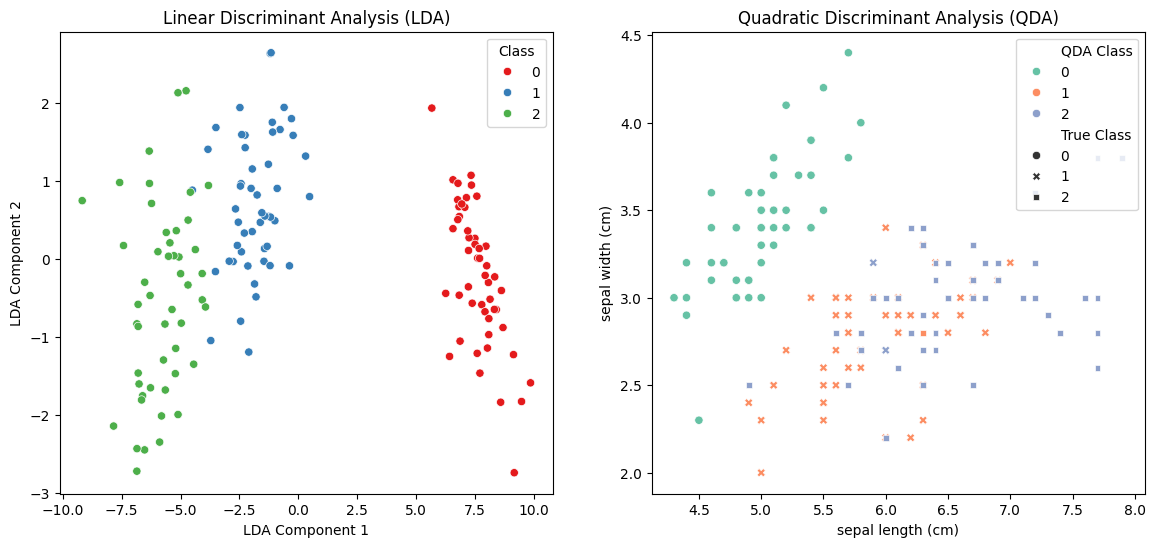

In [7]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Загрузка набора данных Iris
data = load_iris()
X = data.data  # Матрица признаков
y = data.target  # Массив меток классов

# Применение LDA для снижения размерности до 2
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Создание DataFrame для удобной визуализации
lda_df = pd.DataFrame(data=X_lda, columns=['LDA1', 'LDA2'])
lda_df['Class'] = y

# Применение QDA для классификации и визуализации
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
qda_pred = qda.predict(X)
qda_df = pd.DataFrame(data=X, columns=data.feature_names)
qda_df['QDA Class'] = qda_pred
qda_df['True Class'] = y

# Визуализация LDA
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sb.scatterplot(x='LDA1', y='LDA2', hue='Class', data=lda_df, palette='Set1')
plt.title("Linear Discriminant Analysis (LDA)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")

# Визуализация результатов QDA
plt.subplot(1, 2, 2)
sb.scatterplot(x=data.feature_names[0], y=data.feature_names[1], hue='QDA Class', data=qda_df, palette='Set2', style='True Class')
plt.title("Quadratic Discriminant Analysis (QDA)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

plt.show()

Задание 5: Сравнение PCA и LDA.  
Используйте любой набор данных с классифицирующей моделью. Примените PCA и LDA и сравните, как влияют эти методы снижения размерности на эффективность классификации.

In [9]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Загрузка набора данных Wine
data = load_wine()
X = data.data  # Матрица признаков
y = data.target  # Массив меток классов

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Снижение размерности с использованием PCA до 2 компонент
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Снижение размерности с использованием LDA до 2 компонент
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Обучение классификатора на признаках после PCA
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Обучение классификатора на признаках после LDA
model_lda = LogisticRegression(max_iter=1000)
model_lda.fit(X_train_lda, y_train)
y_pred_lda = model_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# Вывод результатов
print(f"Точность модели с признаками после PCA: {accuracy_pca:.2f}")
print(f"Точность модели с признаками после LDA: {accuracy_lda:.2f}")

Точность модели с признаками после PCA: 0.69
Точность модели с признаками после LDA: 0.98


Часть 2. Нелинейные задачи  
Каждое задание должно включать в себя следующие шаги: загрузка и предварительная обработка данных, применение метода снижения размерности, и, при необходимости, обучение модели на полученных признаках и оценка производительности модели.
Если вам нужно больше данных для этих задач, можете использовать эти ресурсы:  
•	[UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php),  
•	[Kaggle Datasets](https://www.kaggle.com/datasets),  
•	[Google's Dataset Search](https://datasetsearch.research.google.com/)  

Задание 1: Применение метода t-SNE.  
Используйте набор данных "Iris" из sklearn.datasets. Примените t-SNE, чтобы снизить размерность до 2-х, и визуализируйте результаты.

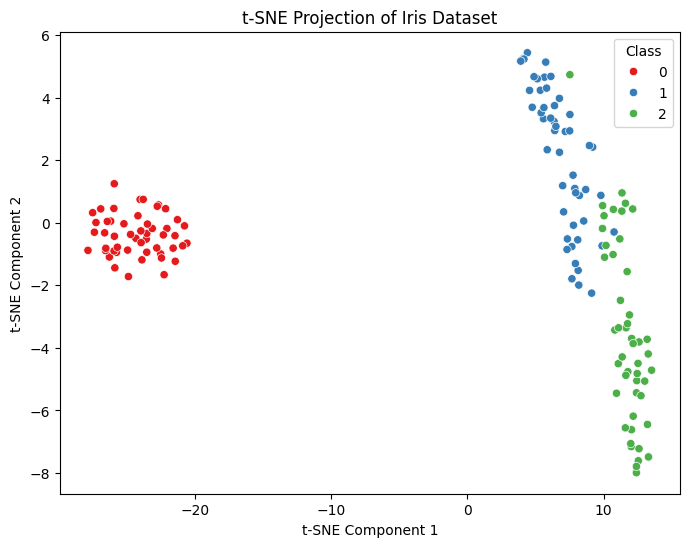

In [10]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Загрузка набора данных Iris
data = load_iris()
X = data.data  # Матрица признаков
y = data.target  # Массив меток классов

# Применение t-SNE для снижения размерности до 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Создание DataFrame для удобной визуализации
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['Class'] = y

# Визуализация результатов t-SNE
plt.figure(figsize=(8, 6))
sb.scatterplot(x='t-SNE1', y='t-SNE2', hue='Class', data=tsne_df, palette='Set1')
plt.title("t-SNE Projection of Iris Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

Задание 2: Определение влияния параметров t-SNE.  
Используйте тот же набор данных "Iris". Примените t-SNE с разными значениями параметров (например, число итераций, learning rate) и сравните полученные результаты.

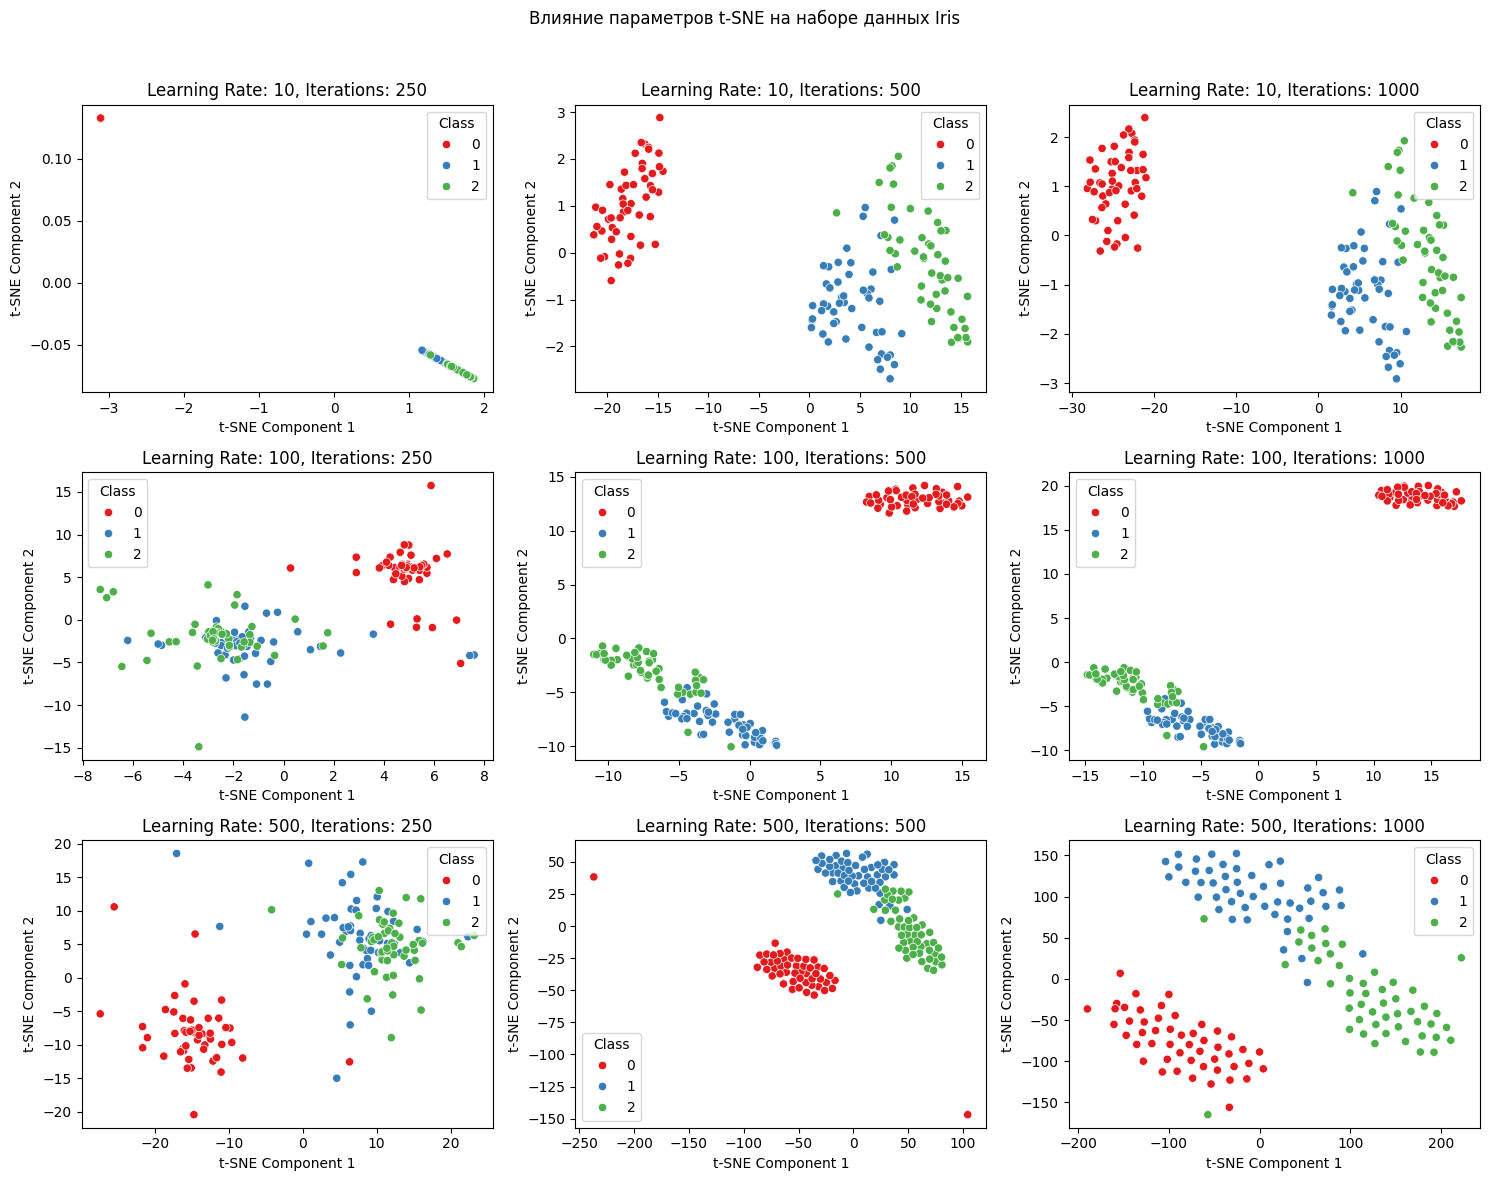

In [12]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Загрузка набора данных Iris
data = load_iris()
X = data.data
y = data.target

# Определим параметры для экспериментов
learning_rates = [10, 100, 500]
n_iters = [250, 500, 1000]

# Настройка графиков для визуализации
fig, axes = plt.subplots(len(learning_rates), len(n_iters), figsize=(15, 12))
fig.suptitle("Влияние параметров t-SNE на наборе данных Iris")

# Цикл по комбинациям параметров
for i, lr in enumerate(learning_rates):
    for j, max_iter in enumerate(n_iters):
        tsne = TSNE(n_components=2, learning_rate=lr, max_iter=max_iter, random_state=42)
        X_tsne = tsne.fit_transform(X)
        
        # Создание DataFrame для удобной визуализации
        tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
        tsne_df['Class'] = y
        
        # Построение графика для данной комбинации параметров
        sb.scatterplot(x='t-SNE1', y='t-SNE2', hue='Class', data=tsne_df, palette='Set1', ax=axes[i, j])
        axes[i, j].set_title(f"Learning Rate: {lr}, Iterations: {max_iter}")
        axes[i, j].set_xlabel("t-SNE Component 1")
        axes[i, j].set_ylabel("t-SNE Component 2")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Задание 3: Сравнение t-SNE и PCA.  
Используйте любой набор данных на ваше усмотрение. Примените PCA и t-SNE, чтобы снизить размерность до 2-х, и сравните разницы в результатах визуализации.

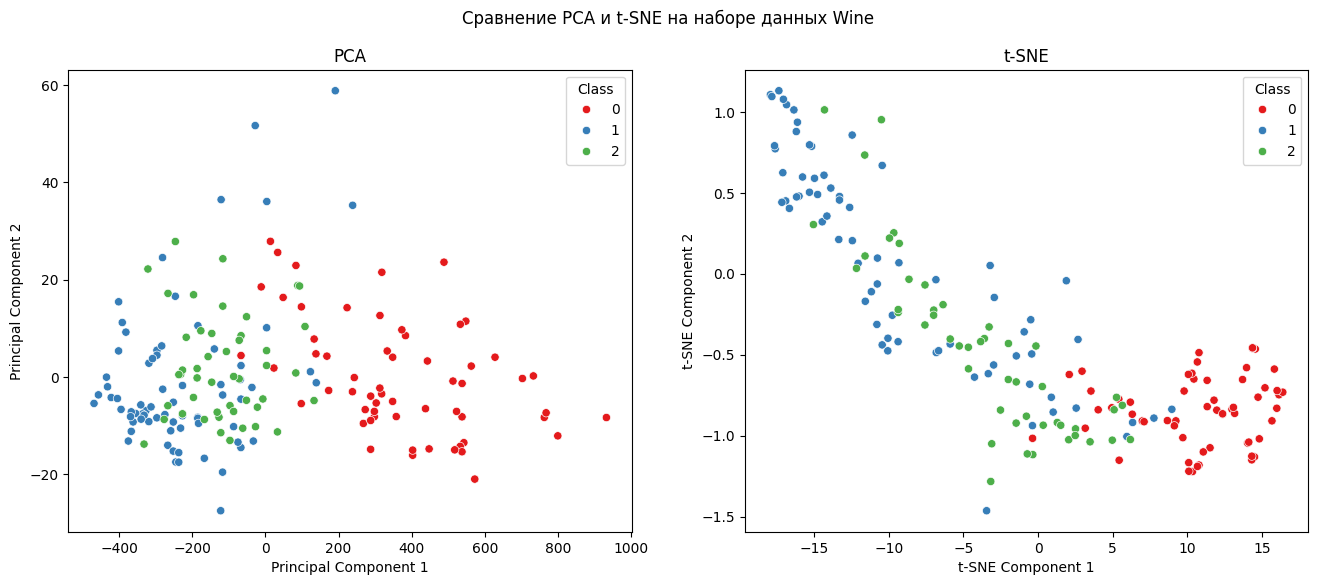

In [13]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Загрузка набора данных Wine
data = load_wine()
X = data.data  # Матрица признаков
y = data.target  # Массив меток классов

# Применение PCA для снижения размерности до 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Применение t-SNE для снижения размерности до 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Создание DataFrames для удобной визуализации
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['Class'] = y

# Визуализация результатов PCA и t-SNE
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Сравнение PCA и t-SNE на наборе данных Wine")

# Визуализация PCA
sb.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='Set1', ax=axes[0])
axes[0].set_title("PCA")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# Визуализация t-SNE
sb.scatterplot(x='t-SNE1', y='t-SNE2', hue='Class', data=tsne_df, palette='Set1', ax=axes[1])
axes[1].set_title("t-SNE")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

plt.show()

Задание 4: Применение UMAP.  
Используйте набор данных "MNIST" (например, содержащийся в sklearn.datasets). Примените UMAP для снижения размерности и визуализируйте результаты.

C:\Users\vladi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\vladi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


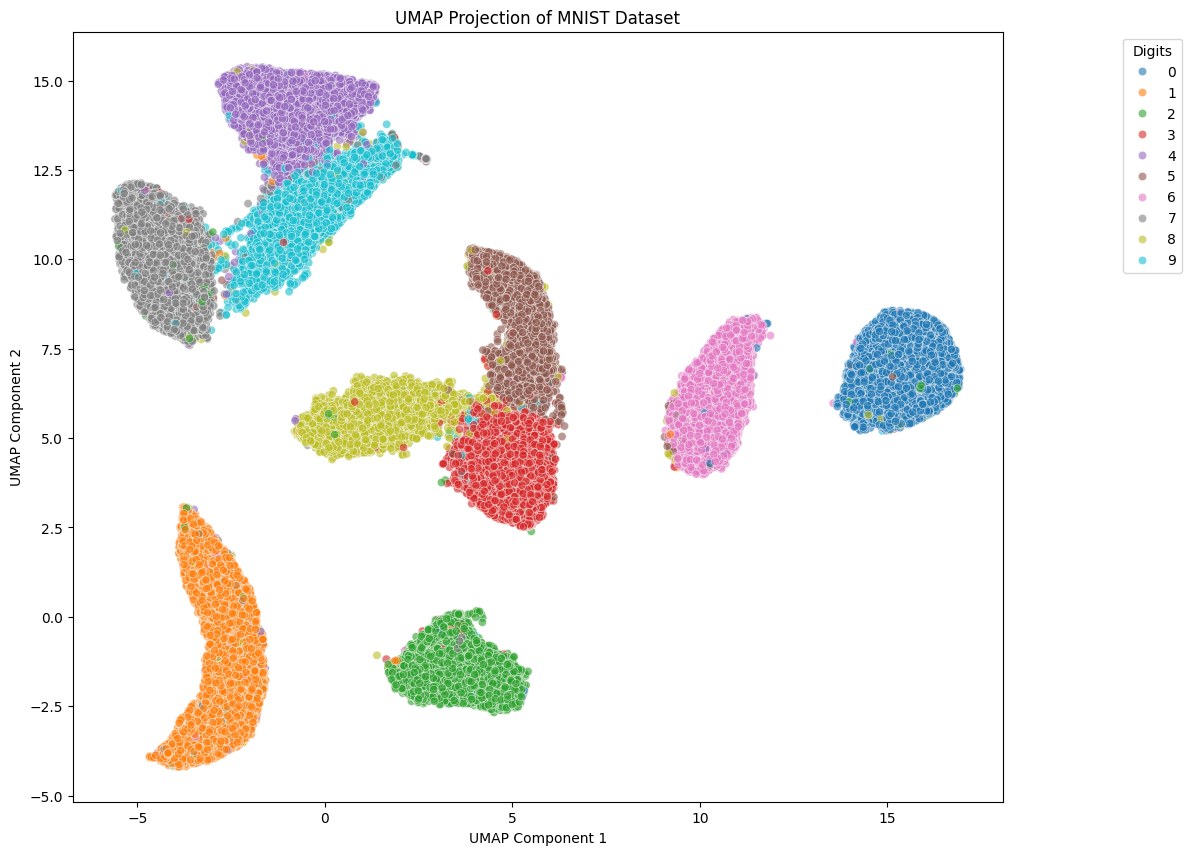

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import fetch_openml
import umap

# Загрузка набора данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Матрица признаков
y = mnist.target.astype(int)  # Массив меток классов (изображения цифр)

# Применение UMAP для снижения размерности до 2
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# Создание DataFrame для удобной визуализации
umap_df = pd.DataFrame(data=X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Class'] = y

# Визуализация результатов UMAP
plt.figure(figsize=(12, 10))
sb.scatterplot(x='UMAP1', y='UMAP2', hue='Class', data=umap_df, palette='tab10', alpha=0.6)
plt.title("UMAP Projection of MNIST Dataset")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title='Digits', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Задание 5: Сравнение UMAP и t-SNE.  
Используйте один и тот же набор данных для применения UMAP и t-SNE. Сравните влияние этих методов снижения размерности на визуальное разделение классов в данных.

C:\Users\vladi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\vladi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


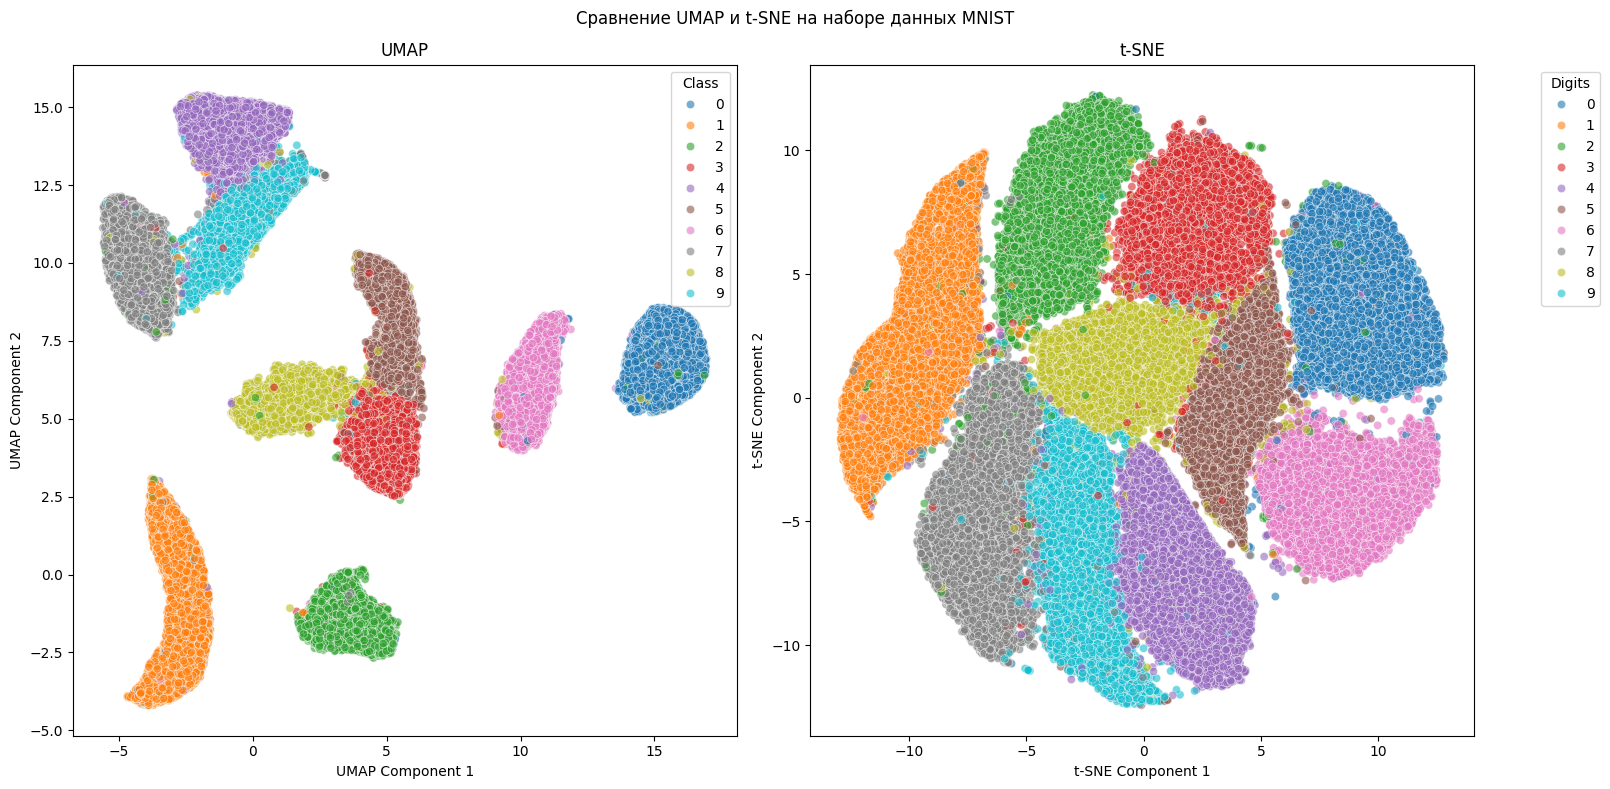

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import fetch_openml
import umap
from sklearn.manifold import TSNE
import pandas as pd

# Загрузка набора данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Матрица признаков
y = mnist.target.astype(int)  # Массив меток классов (изображения цифр)

# Применение UMAP для снижения размерности до 2
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Применение t-SNE для снижения размерности до 2
tsne_reducer = TSNE(n_components=2, random_state=42, n_iter=300)
X_tsne = tsne_reducer.fit_transform(X)

# Создание DataFrames для удобной визуализации
umap_df = pd.DataFrame(data=X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Class'] = y

tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['Class'] = y

# Визуализация результатов UMAP и t-SNE
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Сравнение UMAP и t-SNE на наборе данных MNIST")

# Визуализация UMAP
sb.scatterplot(x='UMAP1', y='UMAP2', hue='Class', data=umap_df, palette='tab10', alpha=0.6, ax=axes[0])
axes[0].set_title("UMAP")
axes[0].set_xlabel("UMAP Component 1")
axes[0].set_ylabel("UMAP Component 2")

# Визуализация t-SNE
sb.scatterplot(x='t-SNE1', y='t-SNE2', hue='Class', data=tsne_df, palette='tab10', alpha=0.6, ax=axes[1])
axes[1].set_title("t-SNE")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

plt.legend(title='Digits', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()